# Importing library

In [1]:
import numpy as np
import pandas as pd
import regex as re
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import make_scorer, accuracy_score
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
import language_tool_python
from concurrent.futures import ProcessPoolExecutor
from sklearn.naive_bayes import MultinomialNB
seed = 202
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics

In [2]:
df = pd.read_csv("data/train_v2_drcat_02.csv")
# external_train = pd.read_csv("/kaggle/input/llm-detect-ai-generated-text/train_essays.csv")
# external_train.rename(columns={'generated': 'label'}, inplace=True)

In [3]:
df.shape

(44868, 5)

In [4]:
df.head()

,text,label,prompt_name,source,RDizzl3_seven
0,Phones\n\nModern humans today are always on th...,0,Phones and driving,persuade_corpus,False
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False
2,Driving while the use of cellular devices\n\nT...,0,Phones and driving,persuade_corpus,False
3,Phones & Driving\n\nDrivers should not be able...,0,Phones and driving,persuade_corpus,False
4,Cell Phone Operation While Driving\n\nThe abil...,0,Phones and driving,persuade_corpus,False


In [5]:
np.unique(df["prompt_name"])

array(['"A Cowboy Who Rode the Waves"', 'Car-free cities',
       'Cell phones at school', 'Community service', 'Distance learning',
       'Does the electoral college work?', 'Driverless cars',
       'Exploring Venus', 'Facial action coding system',
       'Grades for extracurricular activities',
       'Mandatory extracurricular activities', 'Phones and driving',
       'Seeking multiple opinions', 'Summer projects', 'The Face on Mars'],
      dtype=object)

In [6]:
def seed_everything(seed=202):
    import random
    random.seed(seed)
    np.random.seed(seed)

seed_everything(seed)

# Data Imports and Feature Engineering

In [7]:
tool = language_tool_python.LanguageTool('en-US')
def correct_sentence(sentence):
    return tool.correct(sentence)
def correct_df(df):
    with ProcessPoolExecutor() as executor:
        df['text'] = list(executor.map(correct_sentence, df['text']))

Unzipping /tmp/tmpbsk82sq7.zip to /home/tdhttt/.cache/language_tool_python.
Downloaded https://www.languagetool.org/download/LanguageTool-5.7.zip to /home/tdhttt/.cache/language_tool_python.


In [8]:
def how_many_typos(text):    
    return len(tool.check(text))

In [9]:
not_persuade_df = df[df['source'] != 'persuade_corpus']
persuade_df = df[df['source'] == 'persuade_corpus']
sampled_persuade_df = persuade_df.sample(n=6000, random_state=42)

all_human = set(list(''.join(sampled_persuade_df.text.to_list())))
other = set(list(''.join(not_persuade_df.text.to_list())))
chars_to_remove = ''.join([x for x in other if x not in all_human])
print(chars_to_remove)

translation_table = str.maketrans('', '', chars_to_remove)
def remove_chars(s):
    return s.translate(translation_table)

🏖🦁💦☀🧀é╯😜🙃🍮📞🤝🌅🥔🧹🌭と🌷🥩👦🔮ç🏠🏃🍜🚫。が🎣🍭🥟🥶驶💇р😬📦🏯🏋🧚🐧😩😅安使🧑🥑😢🍲🇯🤖♀🍰🎶💼🧩😻
🍎🥤🍣🥘🏟😂🌐🤗⏰🙌🌄🚨全😨🧡📄ん🐰🔬止🦸☹📸🥁所🐠🐬せ🧘📹í🏜👻👂🌧ā🌎😤😍💚🏰🔑💯😷道🛠🙋🍞🎢注🍔🤪🕹а在🎈🎥–す💁😉💅🛍─🤜з😴🌃💰😄😹🥦路🎵🎄🐴🐸😭🏞🏡🌟🚚中🧬😒🏫机🏕😃👫🛫都🌌护📈🚗取👮🤩😵📧🙅は🕵🐆🤫🗳🧐🏈👌🏳🐻🍝响🌲🍕😕🕺…🍖ま—😖法🔋🇸🌽É用🧭🥛り📚🏼😮🥲👩🚔🥪🐝🏄😆🌿🥗😲🌻️🛣😘🤔意😈🏛🐦👕🎊🏢💀🎬🐟💸ü🌳🙏💔🏻🧙💜с完👯🦎🧖🚂💊�唯😔🇧🌞🙈🤷🤣💧🐳🎉­🙊“🥭🚴💭😁¬有🚀💪将🌯的💥🤟🍳🏙🙄💨🎭🍿应💆💃😡🔜📝👥🚌🍽‍💘🏥🥜🎨💬🧠🍟д力必🌠❄✨🚪🌱🚕🤦🐶🥨🤕时に😝者👋ち🌴🏏🌨’🌈🎮🐱🛬あ🔭驾🤓🇺👇み👀手🍓💻📣🛋💡🧽🤛🌫🤘司🍷📷🐢​🍁👍📊🌊🎧📺🦄💤🎃禁😳🎓う😎‘💉□🐾🍋🛸集择🛑🇫保о合📰🔥🌏🤤🏆°👬🎠🥳上💖🏔😋🎾📉💕🤒须🎤🇷🚭🏽该🏀部🇪🐕📅🌮🗣📱😱一🎩🎅😌😓💫🥕🍗🎹🤢和^🍄👨🕒п🚣”ã😠🥖🏦🚑🙀🏨🤞👧🎯🏊选影ê÷👏是🍴е📖🐭👪⚽🥯🕰🤯🔧♂😊🦐🎸こ🧦🇵🐒🛀🔍🌸


In [10]:
df['text'] = df['text'].apply(remove_chars)
df['text'] = df['text'].str.replace('\n', '')

# test = pd.read_csv('/kaggle/input/llm-detect-ai-generated-text/test_essays.csv')
# test['text'] = test['text'].str.replace('\n', '')
# test['text'] = test['text'].apply(remove_chars)
# correct_df(test)
# df = pd.concat([train['text'], test['text']], axis=0)


In [11]:
# Too time consuming to run
# %%time
# correct_df(df)

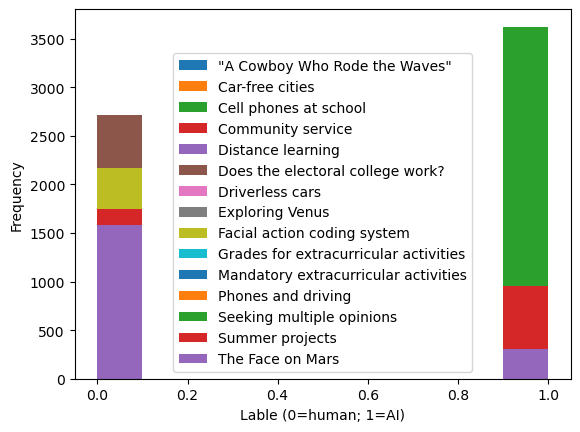

In [12]:
import matplotlib.pyplot as plt

df.groupby("prompt_name")["label"].plot(kind='hist')
plt.legend(np.unique(df["prompt_name"]))
plt.xlabel("Lable (0=human; 1=AI)")
plt.show()

In [13]:
#from sklearn.model_selection import train_test_split
#train, test  = train_test_split(df, test_size=0.20,  stratify=df.label, random_state=5)

In [14]:
train = df.loc[df["prompt_name"] != "The Face on Mars"]
test = df.loc[df["prompt_name"] == "The Face on Mars"]

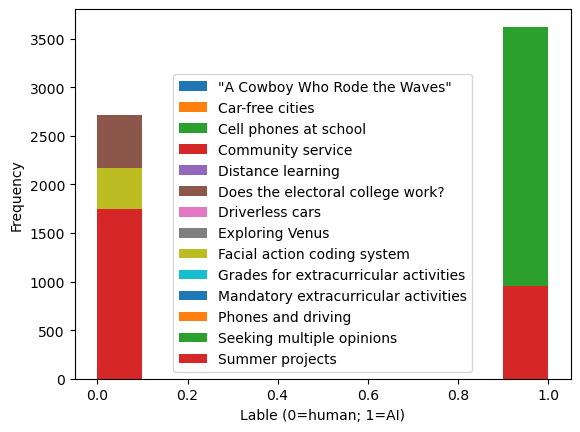

In [15]:
train.groupby("prompt_name")["label"].plot(kind='hist')
plt.legend(np.unique(train["prompt_name"]))
plt.xlabel("Lable (0=human; 1=AI)")
plt.show()

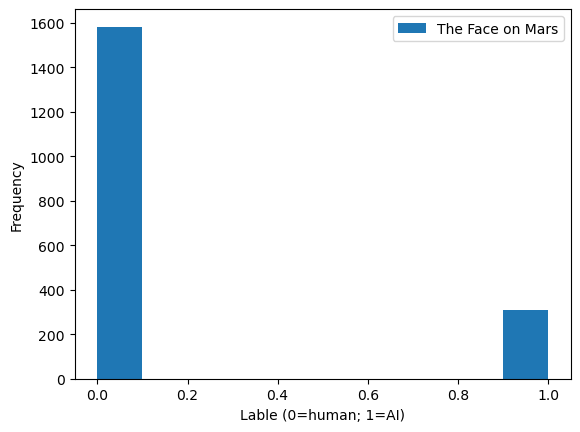

In [16]:
test.groupby("prompt_name")["label"].plot(kind='hist')
plt.legend(np.unique(test["prompt_name"]))
plt.xlabel("Lable (0=human; 1=AI)")
plt.show()

In [17]:
vectorizer = TfidfVectorizer(ngram_range=(3, 5),tokenizer=lambda x: re.findall(r'[^\W]+', x),token_pattern=None,strip_accents='unicode',)
X_train = vectorizer.fit_transform(train['text'])

In [18]:
X_test = vectorizer.transform(test['text'])

# Models

## Logistic Regression

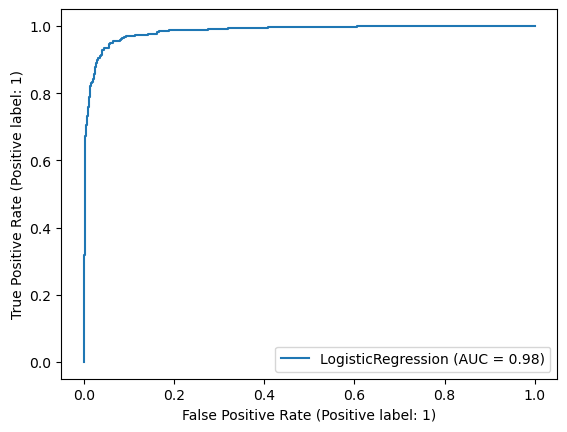

In [19]:
lr_model =LogisticRegression(solver="liblinear")
lr_model.fit(X_train, train['label'])
fig, ax = plt.subplots()
metrics.RocCurveDisplay.from_estimator(lr_model, X_test, test["label"], ax=ax)

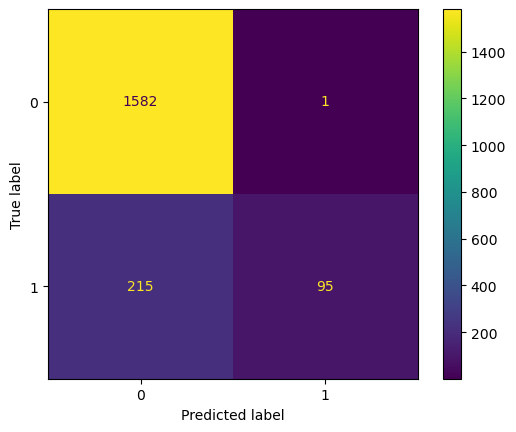

In [48]:
metrics.ConfusionMatrixDisplay.from_estimator(lr_model, X_test, test["label"])

In [ ]:
lr_model_l1 =LogisticRegression(solver="liblinear",penalty='l1')
lr_model_l1.fit(X_train, train['label'])
lr_model_l2 =LogisticRegression(solver="liblinear",penalty='l2')
lr_model_l2.fit(X_train, train['label'])

In [ ]:
lr_model_l12 =LogisticRegression(solver="saga",penalty='elasticnet',l1_ratio=0.5)
lr_model_l12.fit(X_train, train['label'])

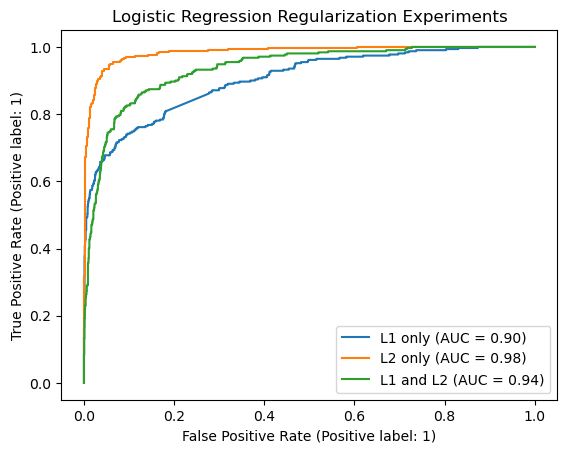

In [56]:
fig, ax = plt.subplots()
estimator_names = ["L1 only", "L2 only", "L1 and L2"]
for i, model in enumerate([lr_model_l1, lr_model_l2, lr_model_l12]):
    metrics.RocCurveDisplay.from_estimator(model, X_test, test["label"], ax=ax, name=estimator_names[i])
    plt.title("Logistic Regression Regularization Experiments")

## SGD Classifier

In [ ]:
sgd_model_huber = SGDClassifier(max_iter=5000, tol=1e-3, loss="modified_huber")   
sgd_model_huber.fit(X_train, train['label'])
sgd_model_hinge = SGDClassifier(max_iter=5000, tol=1e-3, loss="hinge")   
sgd_model_hinge.fit(X_train, train['label'])
sgd_model_logloss = SGDClassifier(max_iter=5000, tol=1e-3, loss="log_loss")   
sgd_model_logloss.fit(X_train, train['label'])

In [45]:
sgd_model_squarehinge = SGDClassifier(max_iter=5000, tol=1e-3, loss="squared_hinge")   
sgd_model_squarehinge.fit(X_train, train['label'])
sgd_model_perceptron = SGDClassifier(max_iter=5000, tol=1e-3, loss="perceptron")   
sgd_model_perceptron.fit(X_train, train['label'])

SGDClassifier(loss='perceptron', max_iter=5000)

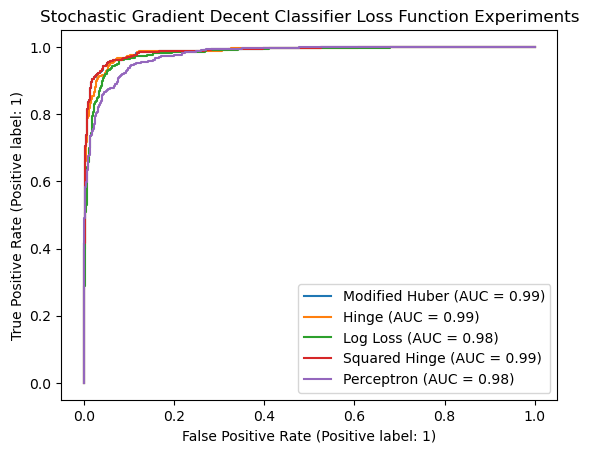

In [57]:
names = ["Modified Huber", "Hinge", "Log Loss", "Squared Hinge", "Perceptron"]
fig, ax = plt.subplots()
for i,model in enumerate([sgd_model_huber, sgd_model_hinge, sgd_model_logloss, sgd_model_squarehinge, sgd_model_perceptron]):
    metrics.RocCurveDisplay.from_estimator(model, X_test, test["label"], ax=ax, name=names[i])
    plt.title("Stochastic Gradient Decent Classifier Loss Function Experiments")

In [53]:
sgd_model_squarehinge_l1 = SGDClassifier(max_iter=5000, tol=1e-3, loss="squared_hinge", penalty='l1')
sgd_model_squarehinge_l1.fit(X_train, train['label'])
sgd_model_squarehinge_l2 = SGDClassifier(max_iter=5000, tol=1e-3, loss="squared_hinge", penalty='l2')
sgd_model_squarehinge_l2.fit(X_train, train['label'])
sgd_model_squarehinge_l1l2 = SGDClassifier(max_iter=5000, tol=1e-3, loss="squared_hinge", penalty='elasticnet')
sgd_model_squarehinge_l1l2.fit(X_train, train['label'])

SGDClassifier(loss='squared_hinge', max_iter=5000, penalty='elasticnet')

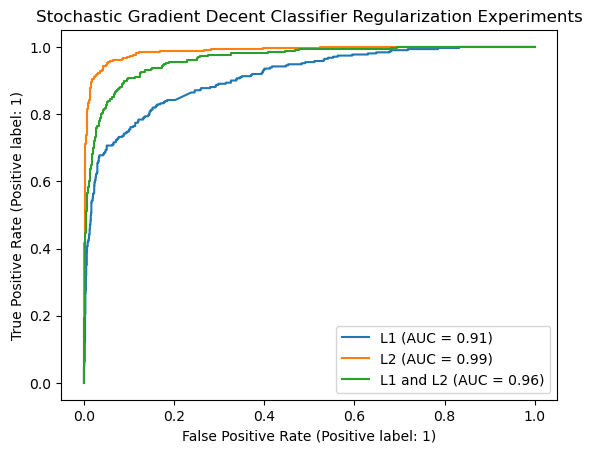

In [58]:
names = ["L1", "L2", "L1 and L2"]
fig, ax = plt.subplots()
for i,model in enumerate([sgd_model_squarehinge_l1, sgd_model_squarehinge_l2, sgd_model_squarehinge_l1l2]):
    metrics.RocCurveDisplay.from_estimator(model, X_test, test["label"], ax=ax, name=names[i])
    plt.title("Stochastic Gradient Decent Classifier Regularization Experiments")

## Multinominal NB

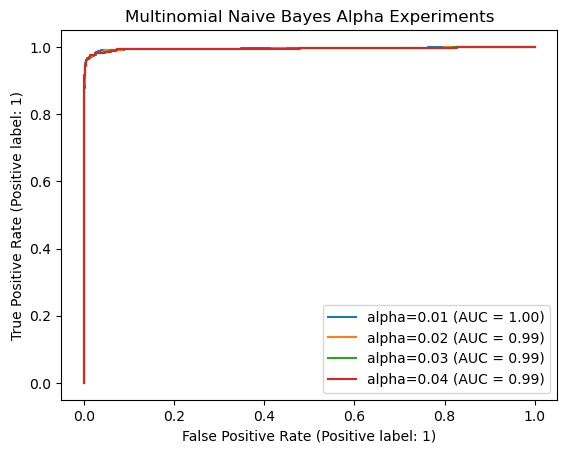

In [59]:
fig, ax = plt.subplots()
for i in range(1,5):
    mnb_model = MultinomialNB(alpha=0.01 * i)
    mnb_model.fit(X_train, train['label'])
    metrics.RocCurveDisplay.from_estimator(mnb_model, X_test, test["label"], ax=ax, name="alpha={}".format(0.01*i))
    plt.title("Multinomial Naive Bayes Alpha Experiments")

## XGBoost

In [22]:
from xgboost import XGBClassifier

In [61]:
%%time
xgb_model = XGBClassifier(objective        = 'binary:logistic', 
                           n_estimators     = 100,
                           n_jobs           =  -1, device="cuda"
                          )
xgb_model.fit(X_train, train['label'])

XGBoostError: [19:44:48] /workspace/src/tree/updater_gpu_hist.cu:781: Exception in gpu_hist: [19:44:48] /workspace/src/c_api/../data/../common/device_helpers.cuh:431: Memory allocation error on worker 0: Caching allocator
- Free memory: 3659137024
- Requested memory: 5835266304

Stack trace:
  [bt] (0) /home/tdhttt/anaconda3/envs/detectAI/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(+0x77f79a) [0x7fc5473b779a]
  [bt] (1) /home/tdhttt/anaconda3/envs/detectAI/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(+0x783994) [0x7fc5473bb994]
  [bt] (2) /home/tdhttt/anaconda3/envs/detectAI/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(+0xaf06f4) [0x7fc5477286f4]
  [bt] (3) /home/tdhttt/anaconda3/envs/detectAI/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(+0xaf1b9c) [0x7fc547729b9c]
  [bt] (4) /home/tdhttt/anaconda3/envs/detectAI/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(+0xb2fde9) [0x7fc547767de9]
  [bt] (5) /home/tdhttt/anaconda3/envs/detectAI/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(+0xb474f7) [0x7fc54777f4f7]
  [bt] (6) /home/tdhttt/anaconda3/envs/detectAI/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(+0xb48301) [0x7fc547780301]
  [bt] (7) /home/tdhttt/anaconda3/envs/detectAI/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(+0x460c79) [0x7fc547098c79]
  [bt] (8) /home/tdhttt/anaconda3/envs/detectAI/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(+0x46176c) [0x7fc54709976c]



Stack trace:
  [bt] (0) /home/tdhttt/anaconda3/envs/detectAI/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(+0xb27f2a) [0x7fc54775ff2a]
  [bt] (1) /home/tdhttt/anaconda3/envs/detectAI/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(+0xb485c9) [0x7fc5477805c9]
  [bt] (2) /home/tdhttt/anaconda3/envs/detectAI/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(+0x460c79) [0x7fc547098c79]
  [bt] (3) /home/tdhttt/anaconda3/envs/detectAI/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(+0x46176c) [0x7fc54709976c]
  [bt] (4) /home/tdhttt/anaconda3/envs/detectAI/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(+0x4c54f7) [0x7fc5470fd4f7]
  [bt] (5) /home/tdhttt/anaconda3/envs/detectAI/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(XGBoosterUpdateOneIter+0x70) [0x7fc546d99ef0]
  [bt] (6) /home/tdhttt/anaconda3/envs/detectAI/lib/python3.8/lib-dynload/../../libffi.so.8(+0xa052) [0x7fc5dc626052]
  [bt] (7) /home/tdhttt/anaconda3/envs/detectAI/lib/python3.8/lib-dynload/../../libffi.so.8(+0x88cd) [0x7fc5dc6248cd]
  [bt] (8) /home/tdhttt/anaconda3/envs/detectAI/lib/python3.8/lib-dynload/_ctypes.cpython-38-x86_64-linux-gnu.so(_ctypes_callproc+0x31f) [0x7fc5dc8734af]



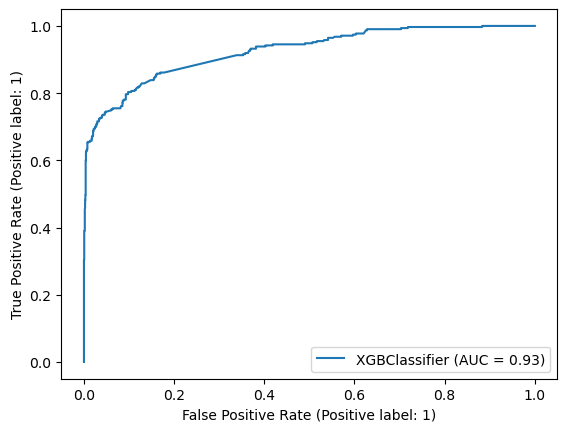

In [26]:
fig, ax = plt.subplots()
metrics.RocCurveDisplay.from_estimator(xgb_model, X_test, test["label"], ax=ax)

## Voting Classifier

In [36]:
lr=LogisticRegression(solver="liblinear")
clf = MultinomialNB(alpha=0.02)
sgd1 = SGDClassifier(max_iter=5000, tol=1e-3, loss="modified_huber")   
# sgd2 = SGDClassifier(max_iter=8000, tol=1e-4, loss="modified_huber", class_weight="balanced") 
# sgd3 = SGDClassifier(max_iter=10000, tol=5e-4, loss="modified_huber", early_stopping=True)
xgb = XGBClassifier(objective        = 'binary:logistic', 
                           n_estimators     = 100,
                           n_jobs           =  -1,
                          )
estimators = [('lr',lr),('mnb',clf),('sgd', sgd1)]
# estimators += ('xgb', xgb)
ensemble = VotingClassifier(estimators=estimators,voting='soft')
ensemble.fit(X_train, train.label)

VotingClassifier(estimators=[('lr', LogisticRegression(solver='liblinear')),
                             ('mnb', MultinomialNB(alpha=0.02)),
                             ('sgd',
                              SGDClassifier(loss='modified_huber',
                                            max_iter=5000))],
                 voting='soft')

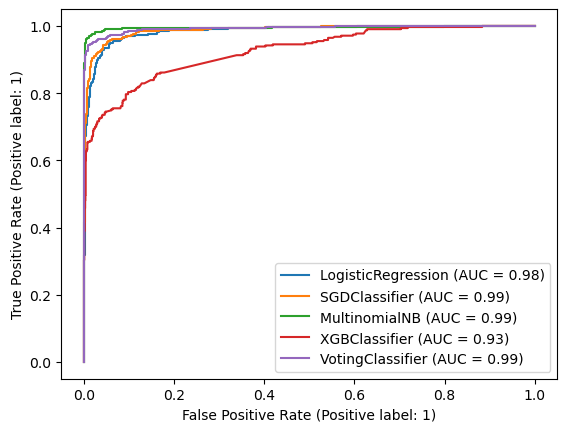

In [29]:
fig, ax = plt.subplots()
for model in [lr_model, sgd_model, mnb_model, xgb_model, ensemble]:
    metrics.RocCurveDisplay.from_estimator(model, X_test, test["label"], ax=ax)

In [62]:
ensemble_hard = VotingClassifier(estimators=estimators,voting='hard')
ensemble_hard.fit(X_train, train.label)

VotingClassifier(estimators=[('lr', LogisticRegression(solver='liblinear')),
                             ('mnb', MultinomialNB(alpha=0.02)),
                             ('sgd',
                              SGDClassifier(loss='modified_huber',
                                            max_iter=5000))])

## TF-IDF N-gram

In [ ]:
# 3,4
vectorizer = TfidfVectorizer(ngram_range=(3, 4),tokenizer=lambda x: re.findall(r'[^\W]+', x),token_pattern=None,strip_accents='unicode',)
X_train_34 = vectorizer.fit_transform(train['text'])
X_test_34 = vectorizer.transform(test['text'])

In [ ]:
sgd_model_tf = SGDClassifier(max_iter=5000, tol=1e-3, loss="squared_hinge")
sgd_model_tf.fit(X_train_34, train['label'])

Text(0.5, 1.0, 'TF-IDF N-gram Experiments (3, 4)')

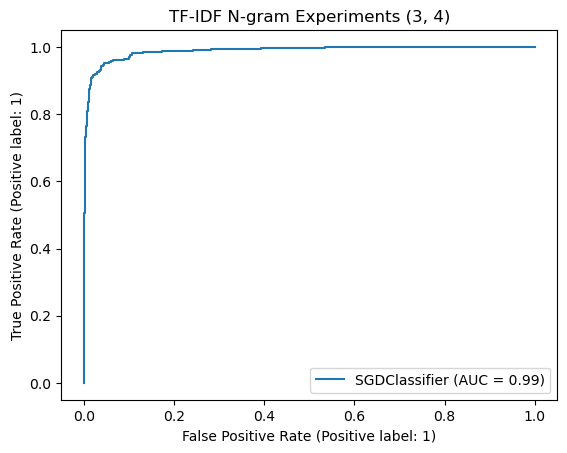

In [69]:
fig, ax = plt.subplots()
metrics.RocCurveDisplay.from_estimator(sgd_model_tf, X_test_34, test["label"], ax=ax)
plt.title("TF-IDF N-gram Experiments (3, 4)")

In [70]:
# 3,7
vectorizer = TfidfVectorizer(ngram_range=(3, 7),tokenizer=lambda x: re.findall(r'[^\W]+', x),token_pattern=None,strip_accents='unicode',)
X_train_37 = vectorizer.fit_transform(train['text'])
X_test_37 = vectorizer.transform(test['text'])

In [71]:
sgd_model_tf37 = SGDClassifier(max_iter=5000, tol=1e-3, loss="squared_hinge")
sgd_model_tf37.fit(X_train_37, train['label'])

SGDClassifier(loss='squared_hinge', max_iter=5000)

Text(0.5, 1.0, 'TF-IDF N-gram Experiments (3, 7)')

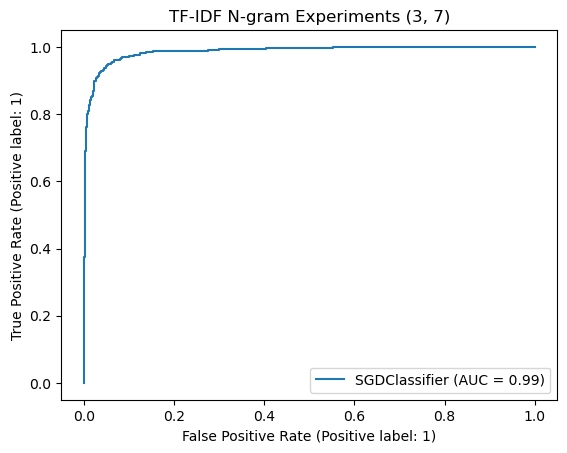

In [72]:
fig, ax = plt.subplots()
metrics.RocCurveDisplay.from_estimator(sgd_model_tf37, X_test_37, test["label"], ax=ax)
plt.title("TF-IDF N-gram Experiments (3, 7)")

Text(0.5, 1.0, 'TF-IDF N-gram Experiments (3, 5)')

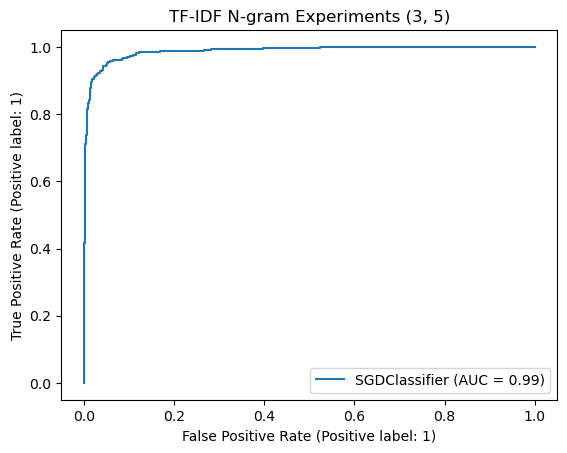

In [74]:
fig, ax = plt.subplots()
metrics.RocCurveDisplay.from_estimator(sgd_model_squarehinge_l2, X_test, test["label"], ax=ax)
plt.title("TF-IDF N-gram Experiments (3, 5)")

In [ ]:
# 2,4
vectorizer = TfidfVectorizer(ngram_range=(2, 4),tokenizer=lambda x: re.findall(r'[^\W]+', x),token_pattern=None,strip_accents='unicode',)
X_train_24 = vectorizer.fit_transform(train['text'])
X_test_24 = vectorizer.transform(test['text'])

Text(0.5, 1.0, 'TF-IDF N-gram Experiments (2, 4)')

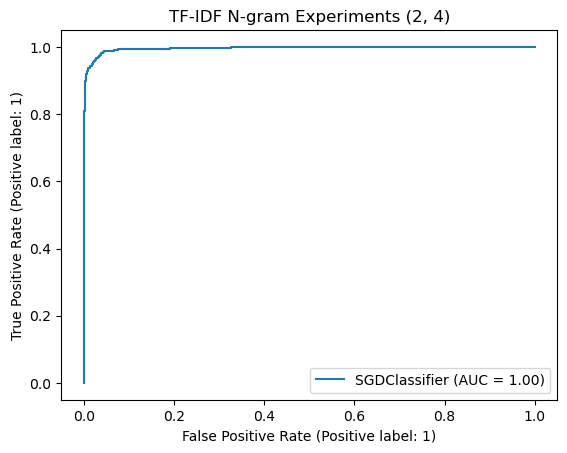

In [76]:
sgd_model_tf24 = SGDClassifier(max_iter=5000, tol=1e-3, loss="squared_hinge")
sgd_model_tf24.fit(X_train_24, train['label'])

fig, ax = plt.subplots()
metrics.RocCurveDisplay.from_estimator(sgd_model_tf24, X_test_24, test["label"], ax=ax)
plt.title("TF-IDF N-gram Experiments (2, 4)")

In [ ]:
# 3,4
vectorizer = TfidfVectorizer(ngram_range=(3, 4),tokenizer=lambda x: re.findall(r'[^\W]+', x),token_pattern=None,strip_accents='unicode',)
X_train_34 = vectorizer.fit_transform(train['text'])
X_test_34 = vectorizer.transform(test['text'])

# 2,4
# 2,7